In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

%matplotlib inline

#Scaler
from sklearn.preprocessing import StandardScaler
#data split
from sklearn.model_selection import train_test_split#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz
import graphviz

#주성분 분석
from sklearn.decomposition import PCA
import statsmodels.api as sm


#회귀 분석
from sklearn.linear_model import LinearRegression
#후진제거법
from sklearn.feature_selection import RFE

#예측
#예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
#예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
#예측/회귀 Gradient
from sklearn.ensemble import GradientBoostingRegressor
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#회귀분석
from statsmodels.formula.api import ols
#선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score#분류
#로지스틱 회귀
from statsmodels.api import Logit
#의사결정나무
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#그래디언트부스트
from sklearn.ensemble import GradientBoostingClassifier
#엑스지부스트
from xgboost import XGBClassifier
from xgboost import plot_importance
#SVM
from sklearn.svm import SVC
#분류 NN (MLP)
from sklearn.neural_network import MLPClassifier
#KNN 분류
from sklearn.neighbors import KNeighborsClassifier#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc#사용할 함수 선언#RSME: root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))#MAPE: mean absolutre percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100#XG Boost에서 사용할 정확도 표현 함수
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precesion = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬 \n',confusion, '\n')
    print('정확도: ', accuracy)
    print('정밀도: ', precesion)
    print('재현율: ', recall)
    print('F1: ', F1)
    print('AUC: ', AUC)#for ignoring warning
import warnings
warnings.filterwarnings('ignore')#음수표시
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
matplotlib.rc("axes", unicode_minus = False)
plt.rcParams["font.family"] = 'NanumGothic'

# 데이터 읽기

In [4]:
# Colab 환경에서 데이터 읽기

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Tel

df_raw = pd.read_csv('tele_customer_final.csv')
df_raw = df_raw.drop(labels = 'Unnamed: 0',axis = 1)

# 컬럼 이름 오름차순으로 변경
df_raw = df_raw.sort_index(axis=1)
df_raw.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Tel
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   6863 non-null   int64  
 1   AgeGroup              6863 non-null   object 
 2   AvgDownloadGB         6863 non-null   int64  
 3   AvgRoamCharge         6863 non-null   int64  
 4   ChurnCategory         1702 non-null   object 
 5   ChurnLabel            6863 non-null   object 
 6   ChurnReason           1702 non-null   object 
 7   ChurnScore            6863 non-null   int64  
 8   CustomerId            6863 non-null   object 
 9   CustomerLTV           6863 non-null   int64  
 10  Dependents            6863 non-null   object 
 11  EndDate               1702 non-null   object 
 12  EndDateTmp        

# 새롭게 산출된 Data

In [5]:
df_raw_choose = df_raw[['Age','Dependents','OnlineBackup','AvgDownloadGB','PaymentMethod','ChurnScore','CustomerLTV','Monthly_charge','AvgRoamCharge','noReferrals','TechSupport','OnlineSecurity','ChurnLabel']]
df_raw_choose['ChurnLabel'] = df_raw['ChurnLabel'].replace({'Yes': 1, 'No': 0})

In [6]:
# df_raw_choose = df_raw_choose.sort_index(axis=1, ascending=False)
# df_raw_choose

In [7]:
#get dummy
df_raw_choose_dummy = pd.get_dummies(df_raw_choose)
df_raw_choose_dummy.columns

Index(['Age', 'AvgDownloadGB', 'ChurnScore', 'CustomerLTV', 'Monthly_charge',
       'AvgRoamCharge', 'noReferrals', 'ChurnLabel', 'Dependents_No',
       'Dependents_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'PaymentMethod_계좌이체', 'PaymentMethod_신용카드', 'PaymentMethod_이체/메일확인',
       'TechSupport_No', 'TechSupport_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes'],
      dtype='object')

In [8]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_choose_x = df_raw_choose_dummy.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
df_raw_choose_y = df_raw_choose_dummy["ChurnLabel"] #목표변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_choose_x, df_raw_choose_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_choose_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_choose_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)

# 선형회귀 돌리고 나온 데이터

분할 전 설명변수 데이터 : (6863, 18)
분할 후 설명변수 데이터 : (4117, 18) 
 Test (2746, 18)


# XGBoost

In [9]:
#모델 생성
#그래디언트 부스팅 모델 생성
xg_uncustomized = XGBClassifier(random_state = 42)
xg_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set:', xg_uncustomized.score(df_train_x,df_train_y))
print('Accuracy on test set:', xg_uncustomized.score(df_test_x,df_test_y))

Accuracy on training set: 1.0
Accuracy on test set: 0.9213401310997815


In [10]:
xg_final = XGBClassifier(min_samples_leaf = 10, max_depth = 6,
                                      n_estimators = 52,
                                      learning_rate = 0.18, random_state = 42)
xg_final.fit(df_train_x, df_train_y)
y_pred = xg_final.predict(df_test_x)
print('train set 정확성:', xg_final.score(df_train_x, df_train_y))
print('test set 정확성:', xg_final.score(df_test_x, df_test_y))
print('Confusion Matrix:\n', confusion_matrix(df_test_y, y_pred))
print('Confusion Matrix:\n', confusion_matrix(df_test_y, y_pred))

[17:36:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

train set 정확성: 0.9769249453485548
test set 정확성: 0.9308084486525856
Confusion Matrix:
 [[1958   88]
 [ 102  598]]
Confusion Matrix:
 [[1958   88]
 [ 102  598]]


# 이탈하지 않는 고객 중 이탈할 고객 예측하기

In [11]:
df_raw_chosen = df_raw_choose[df_raw_choose['ChurnLabel'] == 0]

In [12]:
df_raw_chosen_dummy = pd.get_dummies(df_raw_chosen)

In [13]:
df_raw_chosen_dummy

,Age,AvgDownloadGB,ChurnScore,CustomerLTV,Monthly_charge,AvgRoamCharge,noReferrals,ChurnLabel,Dependents_No,Dependents_Yes,OnlineBackup_No,OnlineBackup_Yes,PaymentMethod_계좌이체,PaymentMethod_신용카드,PaymentMethod_이체/메일확인,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes
0,37,16,65,2205,83590.0,47910,2,0,1,0,0,1,0,1,0,0,1,1,0
1,46,10,66,5414,68929.0,12090,0,0,1,0,1,0,0,1,0,1,0,1,0
5,23,73,55,5108,81852.0,18980,0,0,0,1,1,0,0,1,0,0,1,1,0
6,67,14,26,5011,129452.0,11300,1,0,1,0,0,1,1,0,0,0,1,0,1
7,52,7,49,4604,99408.0,14690,8,0,1,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,20,42,38,5545,105905.0,41250,0,0,1,0,0,1,0,1,0,1,0,1,0
6858,20,59,59,3161,64428.0,52770,0,0,1,0,1,0,0,1,0,0,1,0,1
6860,22,51,33,5870,56600.0,21020,0,0,1,0,0,1,0,1,0,1,0,1,0
6861,21,58,59,4792,80108.0,2370,5,0,1,0,1,0,0,1,0,0,1,0,1


In [14]:
#더미화한 변수를 train set과 test set으로 분리한다
df_raw_chosen_x = df_raw_chosen_dummy.drop(["ChurnLabel"], axis = 1, inplace = False) #목표변수 외
df_raw_chosen_y = df_raw_chosen_dummy["ChurnLabel"] #목표변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_chosen_x, df_raw_chosen_y, test_size = 0.4, random_state = 42)
df_train, df_test = train_test_split(df_raw_chosen_dummy, test_size = 0.4, random_state = 42)
print("분할 전 설명변수 데이터 :", df_raw_chosen_x.shape)
print("분할 후 설명변수 데이터 :", df_train_x.shape, "\n Test", df_test_x.shape)


분할 전 설명변수 데이터 : (5161, 18)
분할 후 설명변수 데이터 : (3096, 18) 
 Test (2065, 18)


## 이탈 여부를 확인을 위한 y_predict

In [15]:
#최종 의사결정나무 모델을 이용하여 이탈하지 않는 고객 중 이탈할 고객 예측하기
y_predict = xg_final.predict(df_raw_chosen_x)

`y_predict = 1`일 때, 이탈

In [16]:
#df_raw_chosen dataFrame에 Y_predict열 추가
df_raw_chosen['Y_predict'] = np.NaN
for i in range(len(df_raw_chosen)):
    df_raw_chosen['Y_predict'][i] = y_predict[i]

In [17]:
#이탈할 고객 df_raw_chosen_danger 로 저장
df_raw_chosen_danger = df_raw_chosen[df_raw_chosen['Y_predict']==1]

In [18]:
df_raw_chosen_danger

,Age,Dependents,OnlineBackup,AvgDownloadGB,PaymentMethod,ChurnScore,CustomerLTV,Monthly_charge,AvgRoamCharge,noReferrals,TechSupport,OnlineSecurity,ChurnLabel,Y_predict
67,39,No,Yes,12,계좌이체,33,4800,125896.0,56160,0,No,No,0,1.0
179,61,No,Yes,6,계좌이체,39,2051,76948.0,47230,0,Yes,No,0,1.0
184,35,No,No,30,이체/메일확인,57,5043,76255.0,42490,0,No,No,0,1.0
229,38,No,Yes,28,신용카드,40,4146,75468.0,0,0,Yes,Yes,0,1.0
236,52,No,Yes,30,계좌이체,44,5135,108367.0,13220,0,No,Yes,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,30,No,No,0,신용카드,59,5409,28770.0,9270,1,No,No,0,1.0
4972,66,No,No,22,계좌이체,69,6072,93294.0,36610,4,No,Yes,0,1.0
5036,23,No,No,0,신용카드,63,3037,23848.0,1810,0,No,No,0,1.0
5110,51,No,No,7,계좌이체,58,2330,108853.0,3390,5,No,No,0,1.0


In [19]:
# df_raw_chosen_danger.to_csv('df_raw_chosen_danger_no_index.csv')

In [20]:
# df_raw_chosen_danger = df_raw_chosen_danger.iloc[:,1:]

In [21]:
# df_raw_chosen_danger.to_csv('df_raw_chosen_danger.csv')

# Shap

In [22]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
df_raw_chosen_danger.columns

Index(['Age', 'Dependents', 'OnlineBackup', 'AvgDownloadGB', 'PaymentMethod',
       'ChurnScore', 'CustomerLTV', 'Monthly_charge', 'AvgRoamCharge',
       'noReferrals', 'TechSupport', 'OnlineSecurity', 'ChurnLabel',
       'Y_predict'],
      dtype='object')

In [24]:
import pandas as pd

data = df_raw_chosen_danger

# X값과 y값으로 데이터 분리
X = data[['Age', 'Dependents', 'OnlineBackup', 'AvgDownloadGB', 'PaymentMethod','ChurnScore', 'CustomerLTV', 'Monthly_charge', 'AvgRoamCharge','noReferrals', 'TechSupport', 'OnlineSecurity']]
data['ChurnLabel'] = data['ChurnLabel'].replace({'Yes': 1, 'No': 0})
y = data['ChurnLabel']

#get dummy
X_dummy = pd.get_dummies(X)

In [25]:
X_dummy

,Age,AvgDownloadGB,ChurnScore,CustomerLTV,Monthly_charge,AvgRoamCharge,noReferrals,Dependents_No,Dependents_Yes,OnlineBackup_No,OnlineBackup_Yes,PaymentMethod_계좌이체,PaymentMethod_신용카드,PaymentMethod_이체/메일확인,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes
67,39,12,33,4800,125896.0,56160,0,1,0,0,1,1,0,0,1,0,1,0
179,61,6,39,2051,76948.0,47230,0,1,0,0,1,1,0,0,0,1,1,0
184,35,30,57,5043,76255.0,42490,0,1,0,1,0,0,0,1,1,0,1,0
229,38,28,40,4146,75468.0,0,0,1,0,0,1,0,1,0,0,1,0,1
236,52,30,44,5135,108367.0,13220,0,1,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,30,0,59,5409,28770.0,9270,1,1,0,1,0,0,1,0,1,0,1,0
4972,66,22,69,6072,93294.0,36610,4,1,0,1,0,1,0,0,1,0,0,1
5036,23,0,63,3037,23848.0,1810,0,1,0,1,0,0,1,0,1,0,1,0
5110,51,7,58,2330,108853.0,3390,5,1,0,1,0,1,0,0,1,0,1,0


In [32]:
import shap

# SHAP 값을 사용하여 각 특성이 모델 예측에 미치는 영향 분석
explainer = shap.TreeExplainer(xg_final)
shap_values = explainer.shap_values(X_dummy)

In [34]:
# JS 시각화 라이브러리 로드
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[107,:], X_dummy.iloc[107,:])

In [35]:
# JS 시각화 라이브러리 로드
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[97,:], X_dummy.iloc[97,:])

In [28]:
# 전체 검증 데이터 셋에 대해서 적용
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_dummy) 

### 그래프 설명  
해당 변수가 빨간색을 띄면 target에 대해 양의 영향력이 존재하는 것이고, 
파란색을 띄면 음의 영향력이 존재하는 것이다.

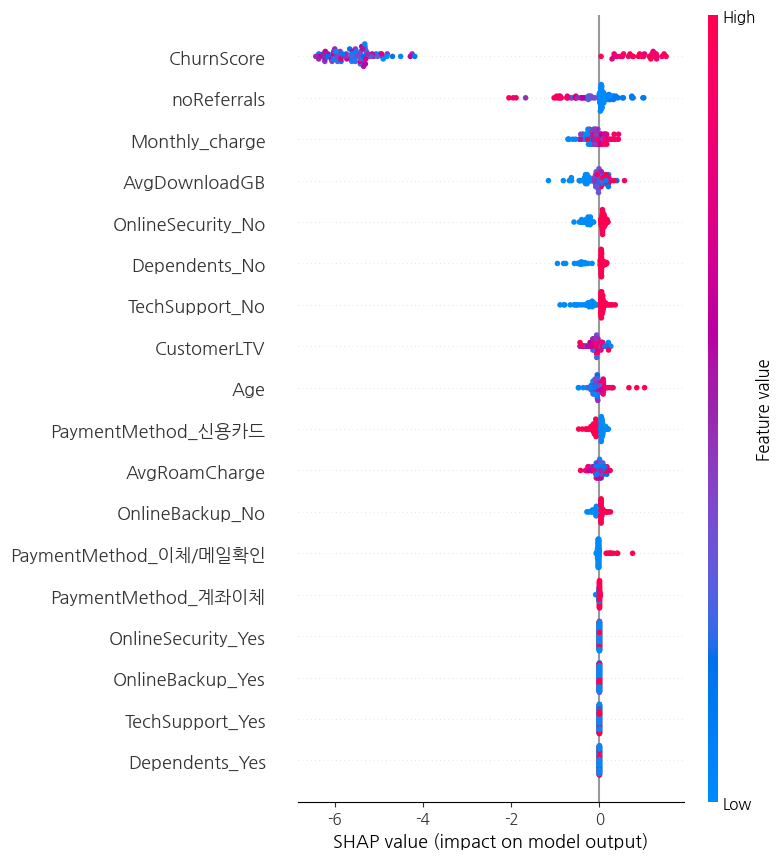

In [29]:
# summary
shap.summary_plot(shap_values, X_dummy)

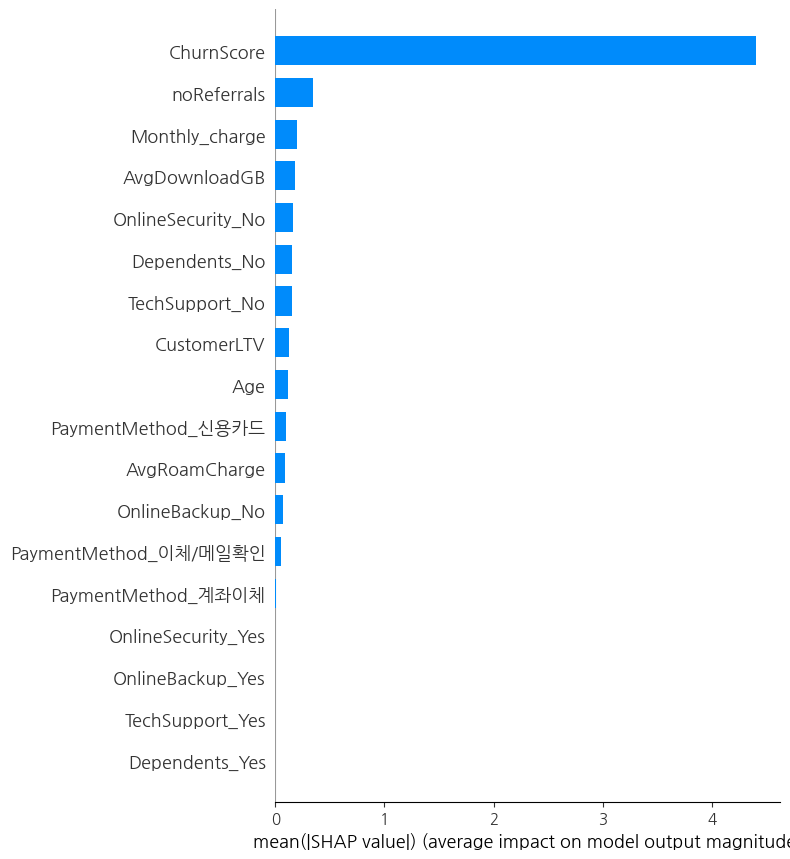

In [30]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X_dummy, plot_type = "bar")

In [57]:
# SHAP 값이 가장 높은 특성 확인
feature_idx = shap_values.mean(axis=0).argsort()[::-1][0]
feature_idx

13

In [61]:
# # 이탈할 확률이 높은 데이터에서 특정 특성의 값을 수정하여 이탈을 예방하는 전략 수립
# threshold = 0.5  # 이탈할 확률 임계값
# for i in range(len(X_dummy)):
#     if xg_final.predict_proba(X_dummy)[i][1] > threshold:  # 이탈할 확률이 높은 경우
#         original_value = X_dummy.iloc[i:i+1, feature_idx:feature_idx+1]  # 수정 전 값
#         for eps in range()
#           new_value = original_value * (1 - eps)  # 수정 후 값
#           X_modified = X_dummy.copy()
#           X_modified.iloc[i:i+1, feature_idx:feature_idx+1] = new_value  # 수정된 데이터
#           new_prediction = xg_final.predict_proba(X_modified)[i][1]  # 수정된 데이터의 예측 결과
#           if new_prediction <= threshold:  # 수정된 데이터로 예측 결과가 이탈하지 않는 경우
#               print(f"Data point {i}: Modify feature {feature_idx} from {original_value} to {new_value}")